In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mission 1

In [2]:
# Charger les données
df = pd.read_csv('game_data_complete.csv', keep_default_na=False, na_values=['', 'NULL'])

In [3]:
# Afficher les 5 premières lignes
df.head()

,Date,ID_Joueur,Temps_Jeu,Victoires,Achats_Objets,Satisfaction,Région,Serveur,Latitude,Longitude
0,2023-01-07,1943,100.913289,1,0,71.3,OC,Stable,30.432320,96.947262
1,2023-01-20,1943,103.048186,1,50,75.9,EU,Stable,5.541137,-89.395196
2,2023-01-29,1943,176.132234,1,50,86.4,AS,Stable,-54.947640,-37.501899
3,2023-01-15,1943,94.473477,0,0,94.6,AF,Stable,-66.108038,-162.469859
4,2023-01-11,1943,193.236652,3,50,55.9,AF,Stable,-34.836281,-134.227974


In [4]:
# Afficher le nombre de joueurs unique
df['ID_Joueur'].nunique()

500

In [5]:
# Calculer NaN pour chaque colonne
df.isna().sum()

Date               0
ID_Joueur          0
Temps_Jeu        750
Victoires          0
Achats_Objets      0
Satisfaction     750
Région           750
Serveur            0
Latitude           0
Longitude          0
dtype: int64

In [6]:
proportion = df.isna().sum() / len(df)
print(proportion)

Date             0.00
ID_Joueur        0.00
Temps_Jeu        0.05
Victoires        0.00
Achats_Objets    0.00
Satisfaction     0.05
Région           0.05
Serveur          0.00
Latitude         0.00
Longitude        0.00
dtype: float64


In [7]:
# Analyser les statistiques globales
df.describe()

,ID_Joueur,Temps_Jeu,Victoires,Achats_Objets,Satisfaction,Latitude,Longitude
count,15000.000000,14250.000000,15000.000000,15000.000000,14250.000000,15000.000000,15000.000000
mean,1494.598000,120.235668,1.139267,54.273333,75.008926,0.142723,-0.623209
std,291.007357,30.038566,1.059975,112.281992,14.321214,52.012019,103.976793
min,1001.000000,30.000000,0.000000,0.000000,50.000000,-89.958798,-179.912479
25%,1234.750000,99.957081,0.000000,0.000000,62.800000,-45.112024,-91.142225
50%,1501.500000,120.196449,1.000000,0.000000,75.000000,0.531799,-0.668055
75%,1741.750000,140.641696,2.000000,50.000000,87.500000,44.547058,89.220585
max,1999.000000,254.372528,4.000000,500.000000,100.000000,89.985052,179.970215


In [8]:
# Connaitre les status possibles pour les serveurs
df["Serveur"].value_counts()

Serveur
Stable        12066
Dégradé        2195
Hors-Ligne      739
Name: count, dtype: int64

In [9]:
# Séparer les serveurs en ligne et hors-ligne
serveurs_down = df[df['Serveur'] == 'Hors-Ligne']
serveurs_up = df[df['Serveur'] != 'Hors-Ligne']

In [10]:
# Calculer la moyenne des achats d'objets pour les serveurs en ligne et hors-ligne
mean_up = serveurs_up["Achats_Objets"].mean()
mean_down = serveurs_down["Achats_Objets"].mean()

In [11]:
# Comparer les achats d'objets entre les serveurs en ligne et hors-ligne
px.bar(x=['En ligne', 'Hors-ligne'], y=[mean_up, mean_down], labels={'x': 'Serveur', 'y': 'Achats Moyens'})

In [12]:
# Pourcentage de réduction des achats d'objets
print(f"Ça représente une baisse de : {round(100 * (mean_up - mean_down) / mean_up, 2)}%")

Ça représente une baisse de : 9.16%


In [13]:
sum_up = serveurs_up["Achats_Objets"].sum()
sum_down = serveurs_down["Achats_Objets"].sum()

px.pie(names=['En ligne', 'Hors-ligne'], values=[sum_up, sum_down], title='Total des achats d\'objets')

# Mission 2

In [14]:
# Calculer le temps total de jeu par joueur
total_play_time = df.groupby('ID_Joueur')["Temps_Jeu"].sum().reset_index()

In [15]:
# Afficher les 5 joueurs ayant le plus de temps de jeu
total_play_time.sort_values(by='Temps_Jeu', ascending=False).head()

,ID_Joueur,Temps_Jeu
280,1561,3995.501446
255,1517,3976.710036
350,1695,3974.456850
241,1483,3943.158482
288,1578,3907.477029


In [16]:
# Afficher les joueurs ayant une satisfaction inférieur a 60
mean_satisfaction = df.groupby('ID_Joueur')["Satisfaction"].mean().reset_index()
mean_satisfaction[mean_satisfaction["Satisfaction"] < 60]

,ID_Joueur,Satisfaction


In [17]:
# Comme il n'y a pas de joueurs ayant une satisfaction inférieur a 60, on peut afficher ceux ayant une satisfaction inférieur a 70
mean_satisfaction[mean_satisfaction["Satisfaction"] < 70]

,ID_Joueur,Satisfaction
31,1051,68.420000
53,1101,68.985185
58,1108,69.273077
97,1176,69.934483
113,1206,67.148276
119,1222,67.364286
126,1237,69.042857
136,1269,68.975000
181,1367,69.775862
190,1382,68.437931


In [18]:
# Afficher les 10 joueurs ayant le plus de temps de jeu et leur satisfaction
top_ten = total_play_time.sort_values(by='Temps_Jeu', ascending=False).head(10)
top_ten = top_ten.merge(mean_satisfaction, on='ID_Joueur')
# Comme il n'y a pas de joueurs ayant un temps de jeu supérieur a 4000, on peut afficher ceux ayant un temps de jeu supérieur a 3900
top_ten["Status"] = top_ten.apply(lambda row: "Risque" if row["Satisfaction"] < 70 else ("VIP" if row["Temps_Jeu"] > 3900 else "Normal"), axis=1)



In [19]:
top_ten

,ID_Joueur,Temps_Jeu,Satisfaction,Status
0,1561,3995.501446,68.730000,Risque
1,1517,3976.710036,76.042308,VIP
2,1695,3974.456850,75.065517,VIP
3,1483,3943.158482,78.948276,VIP
4,1578,3907.477029,76.241379,VIP
5,1021,3895.246646,75.075862,Normal
6,1973,3857.942878,75.356667,Normal
7,1198,3848.154254,75.282143,Normal
8,1888,3842.932926,77.031034,Normal
9,1553,3838.672360,75.550000,Normal


# Mission 3

In [20]:
# Afficher les ventes par région
ventes_par_region = df.groupby('Région')["Achats_Objets"].sum().reset_index()

px.bar(ventes_par_region, x='Région', y='Achats_Objets', labels={'x': 'Région', 'y': 'Achats Objets'}, color='Région')


In [21]:
# Afficher les status des serveurs par région
status_par_region = df.groupby('Région')["Serveur"].value_counts().unstack().reset_index()
px.bar(status_par_region, x='Région', y=["Stable","Dégradé",'Hors-Ligne'], labels={'x': 'Région', 'y': 'Nombre de serveurs'}, barmode='group')

In [22]:
# Second graphique avec pourcentage
status_par_region["Total"] = status_par_region["Stable"] + status_par_region["Dégradé"] + status_par_region["Hors-Ligne"]
status_par_region["Stable"] = status_par_region["Stable"] / status_par_region["Total"]
status_par_region["Dégradé"] = status_par_region["Dégradé"] / status_par_region["Total"]
status_par_region["Hors-Ligne"] = status_par_region["Hors-Ligne"] / status_par_region["Total"]

px.bar(status_par_region, x='Région', y=["Stable","Dégradé",'Hors-Ligne'], labels={'x': 'Région', 'y': 'Pourcentage de serveurs'}, barmode='group')

In [23]:
import plotly.express as px

mean_buy_region = df.groupby('Région')["Achats_Objets"].sum().reset_index()
continent_to_countries = {
   "AF": [
        "DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CMR", "CPV", "CAF", "TCD", "COM", 
        "COG", "COD", "DJI", "EGY", "GNQ", "ERI", "SWZ", "ETH", "GAB", "GMB", "GHA", 
        "GIN", "GNB", "KEN", "LSO", "LBR", "LBY", "MDG", "MWI", "MLI", "MRT", "MUS", 
        "MAR", "MOZ", "NAM", "NER", "NGA", "RWA", "STP", "SEN", "SYC", "SLE", "ZAF", 
        "SSD", "SDN", "TZA", "TGO", "TUN", "UGA", "ZMB", "ZWE", "ESH", "MYT", "REU"
    ],
    "AS": ["AFG", "ARM", "AZE", "BHR", "BGD", "BTN", "BRN", "KHM", "CHN", "CYP", "GEO", "IND", "IDN", "IRN", "IRQ", "ISR", "JPN", "JOR", "KAZ", "KWT", "KGZ", "LAO", "LBN", "MYS", "MDV", "MNG", "MMR", "NPL", "PRK", "OMN", "PAK", "PHL", "QAT", "SAU", "SGP", "KOR", "LKA", "SYR", "TWN", "TJK", "THA", "TLS", "TUR", "TKM", "ARE", "UZB", "VNM", "YEM"],
    "EU": ["ALB", "AND", "ARM", "AUT", "AZE", "BLR", "BEL", "BIH", "BGR", "HRV", "CYP", "CZE", "DNK", "EST", "FIN", "FRA", "GEO", "DEU", "GRC", "HUN", "ISL", "IRL", "ITA", "KAZ", "LVA", "LIE", "LTU", "LUX", "MLT", "MDA", "MCO", "MNE", "NLD", "MKD", "NOR", "POL", "PRT", "ROU", "RUS", "SMR", "SRB", "SVK", "SVN", "ESP", "SWE", "CHE", "TUR", "UKR", "GBR", "VAT"],
    "OC": ["ASM", "AUS", "COK", "FJI", "PYF", "GUM", "KIR", "MNP", "NRU", "NCL", "NZL", "PLW", "PNG", "WSM", "SLB", "TON", "TUV", "VUT"],
    "SA": ["ARG", "BOL", "BRA", "CHL", "COL", "ECU", "GUY", "PRY", "PER", "SUR", "URY", "VEN"],
    "NA" : ["ATG", "BHS", "BRB", "BLZ", "CAN", "CRI", "CUB", "DMA", "DOM", "SLV", "GRD", "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN", "KNA", "LCA", "VCT", "TTO", "USA"],
}

expanded_rows = []

for continent, countries in continent_to_countries.items():
    total_achats = mean_buy_region.loc[mean_buy_region['Région'] == continent, 'Achats_Objets'].sum()
    for country in countries:
        expanded_rows.append({"ISO": country, "Achats_Objets": total_achats})


df_expanded = pd.DataFrame(expanded_rows)

fig = px.choropleth(
    df_expanded,
    locations="ISO",
    color="Achats_Objets",
    color_continuous_scale="Viridis",
    title="Achats par continent"
)


fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGray")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

# Mission 4

In [24]:
# Clear NaN values
df = df.dropna()

In [25]:
# Entrainer un modèle de régression linéaire pour prédire les Achats_Objets
X = df[["Temps_Jeu", "Satisfaction"]]
y = df["Achats_Objets"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model2 = SVR()
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor()

model.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

y_pred1 = model.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred1)}")
print(f"Linear Regression MAE: {mean_absolute_error(y_test, y_pred1)}")

print(f"SVR MSE: {mean_squared_error(y_test, y_pred2)}")
print(f"SVR MAE: {mean_absolute_error(y_test, y_pred2)}")

print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred3)}")
print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred3)}")

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred4)}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred4)}")



Linear Regression MSE: 11792.439353304908
Linear Regression MAE: 65.17341476967303
SVR MSE: 14577.739118718882
SVR MAE: 52.9371206196612
Decision Tree MSE: 25030.14391287437
Decision Tree MAE: 85.90042784908596
Random Forest MSE: 14099.31583041618
Random Forest MAE: 74.40140023337223


La Linear Regression est moin sensible aux valeurs aberrantes que la SVR donc si on veut prédire des valeurs qui sont très éloignées de la moyenne, il vaut mieux utiliser la Linear Regression. Par contre, la SVR est plus précise pour prédire des valeurs qui sont proches de la moyenne.

In [26]:
df["Achats_Objets"].value_counts()

Achats_Objets
0      7690
50     2634
100    1279
200     629
500     623
Name: count, dtype: int64

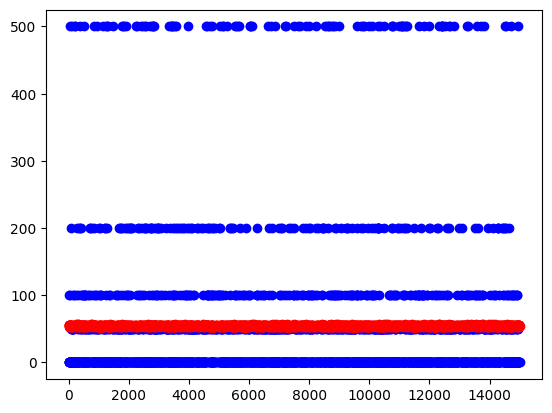

In [27]:
# Achats Objets est une variable catégorielle, la régression linéaire n'est pas adaptée
plt.scatter(x=y_test.index, y=y_test, color='blue')
plt.scatter(x=y_test.index, y=y_pred1, color='red')

In [28]:
# Un modèle de classification est plus adapté
from sklearn.ensemble import RandomForestClassifier

X = df[["Temps_Jeu", "Satisfaction"]]
y = df["Achats_Objets"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



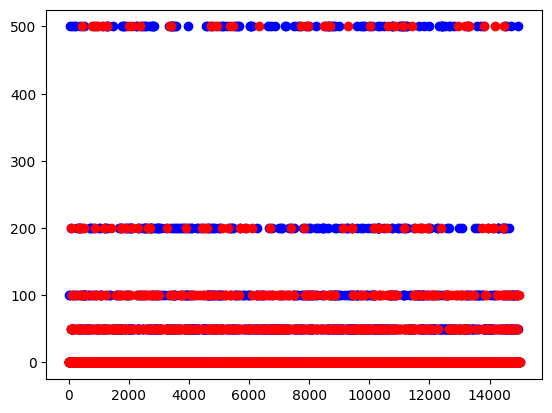

In [29]:
plt.scatter(x=y_test.index, y=y_test, color='blue')
plt.scatter(x=y_test.index, y=y_pred, color='red')

# Mission 6

In [30]:
# Séparer joueur qui achètent des objets et ceux qui n'en achètent pas
group_players = df.groupby('ID_Joueur')["Achats_Objets"].sum().reset_index()

group_players["Acheteur"] = group_players["Achats_Objets"].apply(lambda x: 1 if x > 0 else 0)